# SEIS735_Project_LDA/Cluster_Level3

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('Depression_ICD9.csv')
# pd.set_option('display.max_column',100)

df.head(10)

,DESYNPUF_ID,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10
0,0007CE3DD280CE99,4580,2724,73300,2859,311,V142,NaN,NaN,NaN,NaN
1,0016DB4139E8DC3B,43310,37741,34290,V1251,2724,43411,V4511,4271,NaN,NaN
2,0016DB4139E8DC3B,49121,4821,2724,V5861,7245,V1588,4019,5853,NaN,NaN
3,001E7468C7298570,38611,4019,38830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001E7468C7298570,4359,41401,2724,29040,27651,V1005,58381,43310,4370,NaN
5,001E7468C7298570,5609,29690,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,001E7468C7298570,7802,53019,4019,9974,NaN,NaN,NaN,NaN,NaN,NaN
7,001E7468C7298570,29680,53081,4240,4019,V6284,E9479,2449,NaN,NaN,NaN
8,001E7468C7298570,42842,40390,5854,4280,2724,4439,V4581,8052,4019,NaN
9,003A8937074A5C6D,72402,71500,24290,53081,490,25060,3051,V1254,NaN,NaN


In [30]:
# Change data type for ICD9 CODE
data = df.drop(['DESYNPUF_ID'],axis = 1)
data['ICD9_DGNS_CD_1'] = data['ICD9_DGNS_CD_1'].astype(str)
data['ICD9_DGNS_CD_2'] = data['ICD9_DGNS_CD_1'].astype(str)

In [31]:
data.head(10)

,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10
0,4580,4580,73300,2859,311,V142,NaN,NaN,NaN,NaN
1,43310,43310,34290,V1251,2724,43411,V4511,4271,NaN,NaN
2,49121,49121,2724,V5861,7245,V1588,4019,5853,NaN,NaN
3,38611,38611,38830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4359,4359,2724,29040,27651,V1005,58381,43310,4370,NaN
5,5609,5609,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7802,7802,4019,9974,NaN,NaN,NaN,NaN,NaN,NaN
7,29680,29680,4240,4019,V6284,E9479,2449,NaN,NaN,NaN
8,42842,42842,5854,4280,2724,4439,V4581,8052,4019,NaN
9,72402,72402,24290,53081,490,25060,3051,V1254,NaN,NaN


In [32]:
data.shape

(15000, 10)

In [33]:
data.columns

Index(['ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10'],
      dtype='object')

In [34]:
missing_value=data['ICD9_DGNS_CD_8'].isnull().sum()
missing_value

3322

In [35]:
# Delete those procedures
for i in data.columns:
    data[i][data[i].str.contains('V', na=False)] = ''
    data[i][data[i].str.contains('E', na=False)] = ''
    data[i] = data[i].str.lstrip('0')

In [36]:
# Cut to three numbers(ICD9_Code)
data_3 = data.copy()
for i in data_3.columns:
    data_3[i] = data_3[i].str[0:3]

## Doing LDA begin with the Level 3

In [37]:
# Preparation datatset
cols = []
for i in data_3.columns:
    cols.append(i)
    
# Combine all ICD9_CODE into an array
data_3['New'] = [x[pd.notna(x)].tolist() for x in data_3.values]
processed_docs = data_3['New']
processed_docs

0                          [458, 458, 733, 285, 311, ]
1                   [433, 433, 342, , 272, 434, , 427]
2                   [491, 491, 272, , 724, , 401, 585]
3                                      [386, 386, 388]
4           [435, 435, 272, 290, 276, , 583, 433, 437]
                             ...                      
14995    [250, 250, 276, 682, 300, 272, 788, 414, 296]
14996       [389, 389, 320, 276, 493, 518, 785, 514, ]
14997    [278, 278, 300, 585, 401, 244, 197, 553, 366]
14998       [296, 296, , 333, 309, 428, 332, 401, 496]
14999    [389, 389, 403, 584, 785, 294, 427, 845, 276]
Name: New, Length: 15000, dtype: object

In [38]:
# Preparation for LDA
from gensim import corpora

dictionary = corpora.Dictionary(processed_docs)
dictionary.token2id

{'': 0,
 '285': 1,
 '311': 2,
 '458': 3,
 '733': 4,
 '272': 5,
 '342': 6,
 '427': 7,
 '433': 8,
 '434': 9,
 '401': 10,
 '491': 11,
 '585': 12,
 '724': 13,
 '386': 14,
 '388': 15,
 '276': 16,
 '290': 17,
 '435': 18,
 '437': 19,
 '583': 20,
 '560': 21,
 '780': 22,
 '997': 23,
 '244': 24,
 '296': 25,
 '424': 26,
 '428': 27,
 '443': 28,
 '805': 29,
 '242': 30,
 '250': 31,
 '305': 32,
 '490': 33,
 '530': 34,
 '787': 35,
 '477': 36,
 '574': 37,
 '600': 38,
 '185': 39,
 '307': 40,
 '333': 41,
 '369': 42,
 '438': 43,
 '507': 44,
 '518': 45,
 '410': 46,
 '425': 47,
 '786': 48,
 '996': 49,
 '414': 50,
 '555': 51,
 '412': 52,
 '418': 53,
 '584': 54,
 '730': 55,
 '998': 56,
 '280': 57,
 '294': 58,
 '397': 59,
 '588': 60,
 '295': 61,
 '536': 62,
 '729': 63,
 '781': 64,
 '274': 65,
 '345': 66,
 '496': 67,
 '154': 68,
 '493': 69,
 '275': 70,
 '278': 71,
 '540': 72,
 '553': 73,
 '317': 74,
 '331': 75,
 '227': 76,
 '403': 77,
 '599': 78,
 '356': 79,
 '426': 80,
 '692': 81,
 '162': 82,
 '415': 83,
 '486

In [39]:
corpus = [dictionary.doc2bow(code) for code in processed_docs]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)],
 [(0, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1)],
 [(0, 2), (5, 1), (10, 1), (11, 2), (12, 1), (13, 1)],
 [(14, 2), (15, 1)],
 [(0, 1), (5, 1), (8, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1)],
 [(5, 1), (21, 2)],
 [(10, 1), (22, 2), (23, 1)],
 [(0, 2), (10, 1), (24, 1), (25, 2), (26, 1)],
 [(0, 1), (5, 1), (10, 1), (12, 1), (27, 3), (28, 1), (29, 1)],
 [(0, 1), (13, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(7, 2), (10, 1), (12, 1), (27, 1), (34, 1), (35, 1)],
 [(0, 2), (7, 1), (10, 1), (24, 1), (36, 1), (37, 2), (38, 1)],
 [(39, 2)],
 [(0, 1), (9, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [(3, 1), (5, 1), (19, 1), (27, 1), (46, 2), (47, 1), (48, 1), (49, 1)],
 [(0, 1), (1, 2), (4, 1), (16, 1), (22, 1), (50, 1), (51, 1)],
 [(25, 2)],
 [(3, 1),
  (12, 1),
  (16, 1),
  (45, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1)],
 [(27, 1), (31, 1), (46, 2), (48, 1), (57, 1), (58, 1), (59, 1), (60, 1)],
 [(32

In [40]:
# Train LDA model
import gensim.models.ldamodel as lda
model = lda.LdaModel(corpus, id2word=dictionary, num_topics=4)

# Show all topics
model.show_topics()

[(0,
  '0.087*"428" + 0.070*"486" + 0.063*"491" + 0.051*"518" + 0.040*"414" + 0.029*"401" + 0.028*"427" + 0.027*"250" + 0.021*"584" + 0.020*""'),
 (1,
  '0.078*"" + 0.047*"276" + 0.040*"250" + 0.038*"428" + 0.033*"584" + 0.029*"410" + 0.027*"585" + 0.026*"285" + 0.026*"389" + 0.025*"401"'),
 (2,
  '0.103*"" + 0.073*"427" + 0.056*"414" + 0.047*"276" + 0.040*"401" + 0.036*"272" + 0.034*"599" + 0.027*"250" + 0.025*"296" + 0.021*"428"'),
 (3,
  '0.112*"" + 0.052*"401" + 0.043*"715" + 0.031*"305" + 0.030*"272" + 0.027*"250" + 0.026*"295" + 0.024*"733" + 0.022*"530" + 0.021*"780"')]

In [41]:
# Show the specific topic with the specific number of items
topic1 = model.print_topic(0, topn=10) #(the specific topic, number of items)
topic1

'0.087*"428" + 0.070*"486" + 0.063*"491" + 0.051*"518" + 0.040*"414" + 0.029*"401" + 0.028*"427" + 0.027*"250" + 0.021*"584" + 0.020*""'

## Plot Word cloud

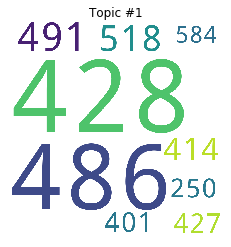

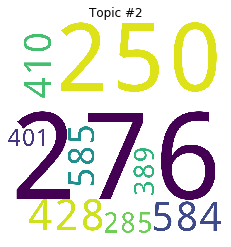

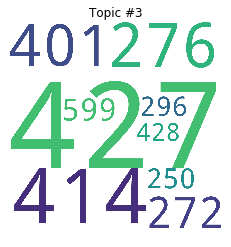

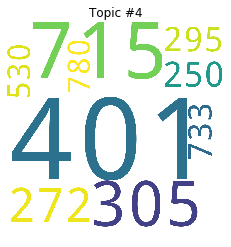

In [42]:
from wordcloud import WordCloud

for t in range(model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white',  #color of the canvas.
                         width=1000,  # width of the canvas.
                         height=1000  # height of the canvas.
                         ).fit_words(dict(model.show_topic(t, 10))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    plt.show()

# Prepare for Clutering

In [43]:
# Get probability of our dataset based on topics
prob=[]
for i in range(len(corpus)):
    prob.append(model.get_document_topics(corpus[i]))

DF = pd.DataFrame([])
col = ['One','Two','Three','Four']
ind = []
val = []
for k in range(len(prob)):
    b = prob[k]
    for i in range(len(b)):
        ind.append(b[i][0])
        val.append(b[i][1])
n = np.transpose(np.array(val).reshape(len(prob),len(b)))
for i in range(len(col)):
    DF[col[i]] = n[i]
n = np.transpose(n)

DF.head(30)

,One,Two,Three,Four
0,0.037576,0.038308,0.539236,0.384880
1,0.028111,0.028320,0.915049,0.028520
2,0.442944,0.029471,0.029697,0.497888
3,0.062510,0.812470,0.062515,0.062506
4,0.025296,0.025497,0.923555,0.025652
5,0.063531,0.063693,0.066129,0.806646
6,0.050885,0.454447,0.053526,0.441143
7,0.032188,0.032126,0.902162,0.033524
8,0.917427,0.027294,0.027938,0.027342
9,0.028209,0.028475,0.029180,0.914136


In [44]:
# Cluster 3 groups
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(DF)
y_kmeans = kmeans.predict(DF)
centers = kmeans.cluster_centers_
labels = kmeans.fit(DF)

In [45]:
centers

array([[0.10798145, 0.0830092 , 0.7201736 , 0.08883569],
       [0.3586702 , 0.08057356, 0.08542606, 0.4753302 ],
       [0.10474489, 0.7193381 , 0.08547275, 0.09044431]], dtype=float32)

In [46]:
label = labels.labels_
label

array([2, 2, 1, ..., 1, 2, 0], dtype=int32)

In [47]:
DF['label']=label
DF

,One,Two,Three,Four,label
0,0.037576,0.038308,0.539236,0.384880,2
1,0.028111,0.028320,0.915049,0.028520,2
2,0.442944,0.029471,0.029697,0.497888,1
3,0.062510,0.812470,0.062515,0.062506,0
4,0.025296,0.025497,0.923555,0.025652,2
...,...,...,...,...,...
14995,0.026111,0.262859,0.684405,0.026625,2
14996,0.026973,0.754907,0.192086,0.026034,0
14997,0.026142,0.027293,0.026317,0.920248,1
14998,0.027770,0.026309,0.475959,0.469963,2


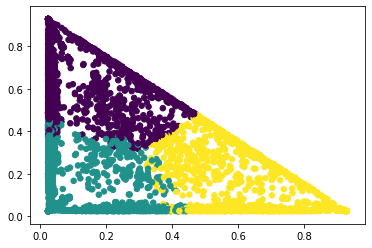

In [48]:
# Plot three cluters
import matplotlib.patches as mpatches

plt.scatter(DF['Two'], DF['Three'], c=y_kmeans, s=30)

In [49]:
data_check = DF.sample(n = 500)
data_check.head(5)

,One,Two,Three,Four,label
5246,0.024304,0.303813,0.646798,0.025084,2
6050,0.632562,0.036538,0.037455,0.293446,1
1606,0.026518,0.220719,0.027345,0.725418,1
355,0.025442,0.025643,0.922836,0.026079,2
14318,0.046338,0.044764,0.864794,0.044105,2


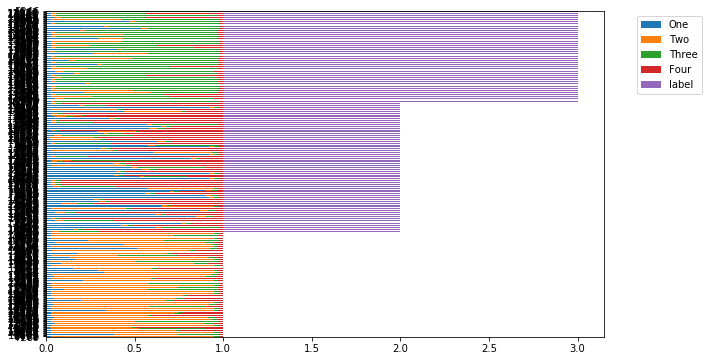

In [56]:
# # Plot probability for all
ax = data_check.sort_values('label').plot.barh(stacked=True, figsize=(10, 6), edgecolor='none')
horiz_offset = 1.05
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))
plt.show()